<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Proyecto/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install corner

In [4]:
import corner

In [5]:
data = np.loadtxt("/content/drive/MyDrive/Cosas ML/Data__Proyecto.txt",delimiter=',').T

In [6]:
x=data[1]
y=data[0]

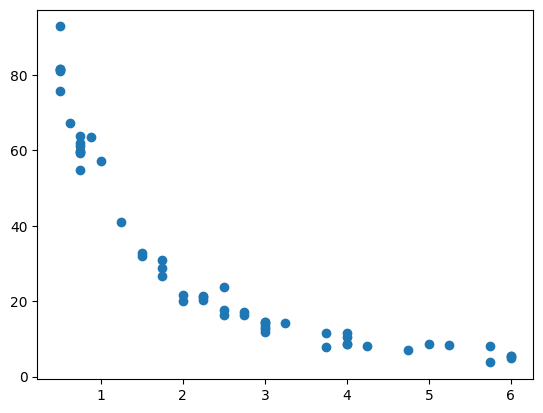

In [7]:
#Gráfica de datos
plt.scatter(x,y)

Los datos son el resultado de un estudio con calibración de ultrasonido. La variable y es la respuesta del ultrasonido y la variable x(predictora) es la distancia del metal

El data set usado representa a una función exponencial de la forma: $y=\frac{e^{-\theta_{1}x}}{\theta_{2}+\theta_{3}x} +\theta_{4} $ En donde las A son parámetros que determinaremos

Referencia: Chwirut, D., NIST (1979).
Ultrasonic Reference Block Study.

Usaremos el métrodo de cadenas de markov para llegar a los parámetros que describan a nuestra función


In [8]:
#Código para generar un theta propuesto
def tetha_prop(tet_in1,tet_in2,tet_in3,tet_in4, sig1, sig2,sig3,sig4):
  tet_p=np.zeros(4)
  tet_p[0]= np.random.normal(tet_in1,sig1)
  tet_p[1]= np.random.normal(tet_in2,sig2)
  tet_p[2]= np.random.normal(tet_in3,sig3)
  tet_p[3]= np.random.normal(tet_in4,sig4)
  return tet_p

In [9]:
#Definición del modelo que utilizaremos
def model(x,tetha):
  f=tetha[0]+(np.exp(-tetha[1]*x))/(tetha[2]+tetha[3]*x)
  return f

In [10]:
#Definición de likelihood gaussiano
def likelihood(y,x,tetha):
  f=model(x,tetha)
  R=0
  for i in range(len(np.array(y))):
    R+=(y[i]-f[i])**2
  return -(0.5)*R

In [11]:
#Definición de prior plano
def prior(Tet_min0,Tet_min1,Tet_min2,Tet_min3,Tet_max0, Tet_max1,Tet_max2,Tet_max3,tet_prop):
  if Tet_max0 > tet_prop[0]  > Tet_min0 and Tet_max1 > tet_prop[1]  > Tet_min1 and Tet_max2 > tet_prop[2]  > Tet_min2 and Tet_max3 > tet_prop[3]  > Tet_min3:
    LPrior=0
  else:
    LPrior=-math.inf
  return LPrior

In [12]:
#Definición de posterior
def Post(prior, likelihood):
  Post = likelihood + prior
  return Post

In [13]:
#Función para hacer la evalución de los thetas propuestos
def Eval(N,y,x,tet_ini,sig1,sig2,sig3,sig4,T_min0, T_max0, T_min1, T_max1, T_min2, T_max2,T_min3 , T_max3):
  Tet_accept=tet_ini
  Tet_acc = np.array(Tet_accept)
  for i in range(N):
    Prop = tetha_prop(tet_ini[0],tet_ini[1], tet_ini[2], tet_ini[3],sig1,sig2,sig3, sig4)
    if Post(prior(T_min0,T_min1,T_min2,T_min3,T_max0,T_max1, T_max2,T_max3, Prop),likelihood(y,x,Prop)) > Post(prior(T_min0,T_min1,T_min2,T_min3,T_max0,T_max1, T_max2,T_max3,tet_ini),likelihood(y,x,tet_ini)):
      Tet_acc = np.vstack((Tet_acc,Prop))
      tet_ini= Prop
    else:
      ptest=np.random.uniform(0,1)
      if Post(prior(T_min0,T_min1,T_min2,T_min3,T_max0,T_max1, T_max2,T_max3,Prop),likelihood(y,x,Prop))-Post(prior(T_min0,T_min1,T_min2,T_min3,T_max0,T_max1, T_max2,T_max3,tet_ini),likelihood(y,x,tet_ini)) > np.log(ptest):
        Tet_acc= np.vstack((Tet_acc,Prop))
        tet_ini= Prop
  return Tet_acc

In [14]:
#Theta propuesto incialmente, elegido por el usuario
tet_ini=np.array([0.1,0.1,0.1,0.1])

In [15]:
#Número de iteraciones a realizar
N=100000

In [16]:
#sigma utilizado para generar thetas prouestos, ademas del los mínimos y másximos de cada theta
sig1=0.001
sig2=0.001
sig3=0.001
sig4=0.001
T_min0, T_max0= -50,50
T_min1, T_max1= -50,50
T_min2, T_max2= -50,50
T_min3, T_max3= -50,50

Tuve que usar sigmas bastate pequeñas debido a que los valores que estaba llegando parecían ser pequeños

In [17]:
Tethas = Eval(N,y,x,tet_ini,sig1,sig2,sig3,sig4,T_min0, T_max0, T_min1, T_max1,T_min2, T_max2,T_min3 , T_max3)

In [18]:
Graf = Tethas.T

In [19]:
#últimos valores aceptados
Graf[:,-1]

array([0.11025008, 0.17351262, 0.00549062, 0.01160255])

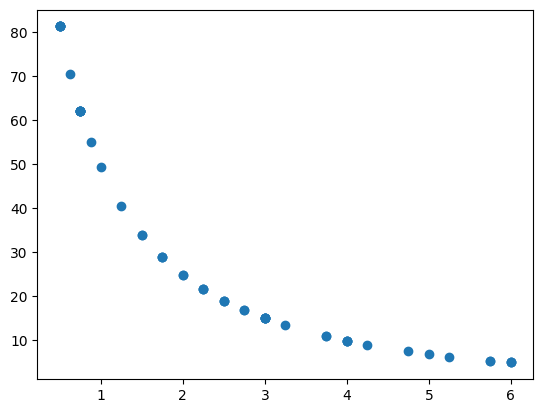

In [20]:
#Gráfica usando los últimos parámetros aceptados:
plt.scatter(x,model(x,Graf[:,-1]))

(0.085, 0.12)

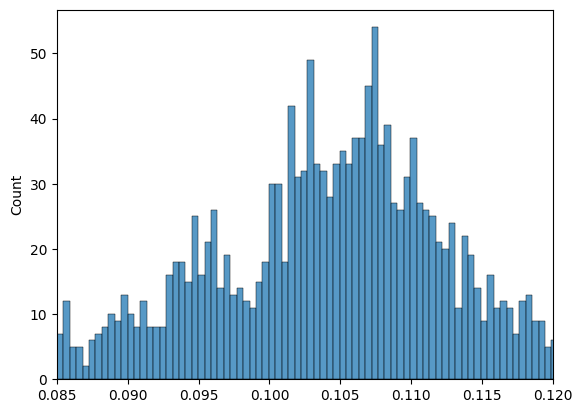

In [21]:
#Gráficos de theta0
sns.histplot(Graf[0,:], bins=100)
plt.xlim(0.085, 0.12)

Con este histograma vemos que donde es más propable que se encuentre theta0 debe de ser entre 0.095 y 0.110 aproximadamente

(0.14, 0.18)

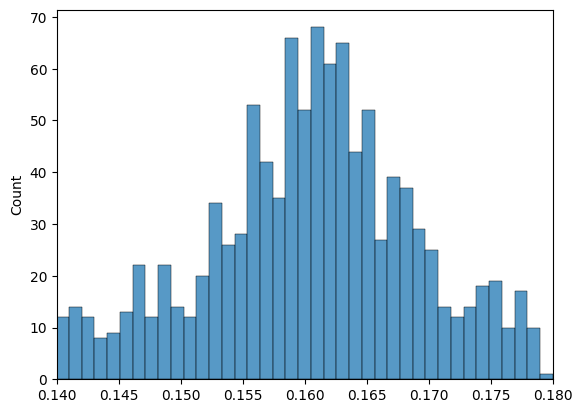

In [37]:
#Gráficos de theta1
sns.histplot(Graf[1,:], bins=100)
plt.xlim(0.14, 0.18)

Con este histograma vemos que el valor verdadero de theta1, parte del argumento del exponencial, debe encontrarse entre 0.15 y 0.175

(0.0, 0.01)

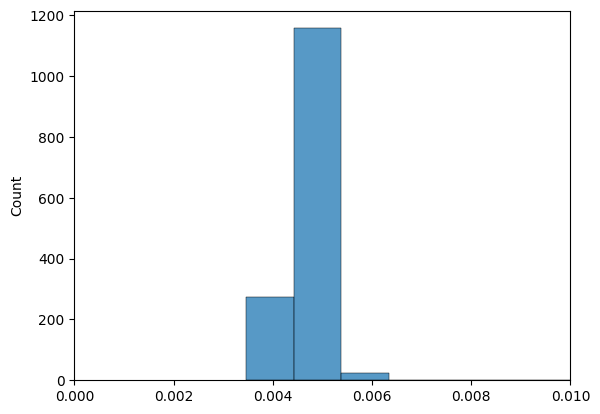

In [23]:
#Gráficos de theta2
sns.histplot(Graf[2,:], bins=100)
plt.xlim(0,0.01)

Con este histograma vemos que el valor verdadero de tetha2, parte del denominador de la función, debe encontrarse entre 0.003 y 0.006

(0.0, 0.03)

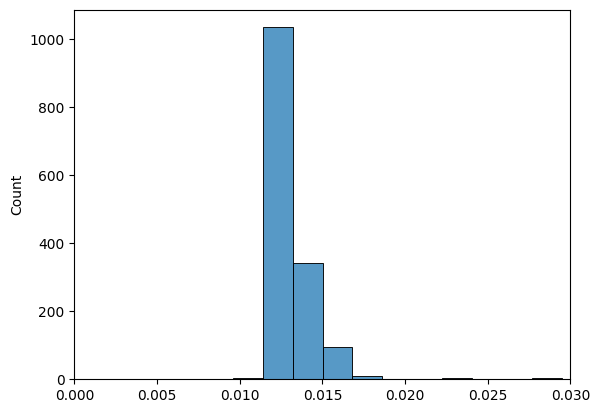

In [24]:
sns.histplot(Graf[3,:], bins=50)
plt.xlim(0,0.03)

Con este histograma vemos que el valor verdadero de tetha3, parte del denominador de la función que se multiplica por x, debe encontrarse entre 0.01 y 0.015.

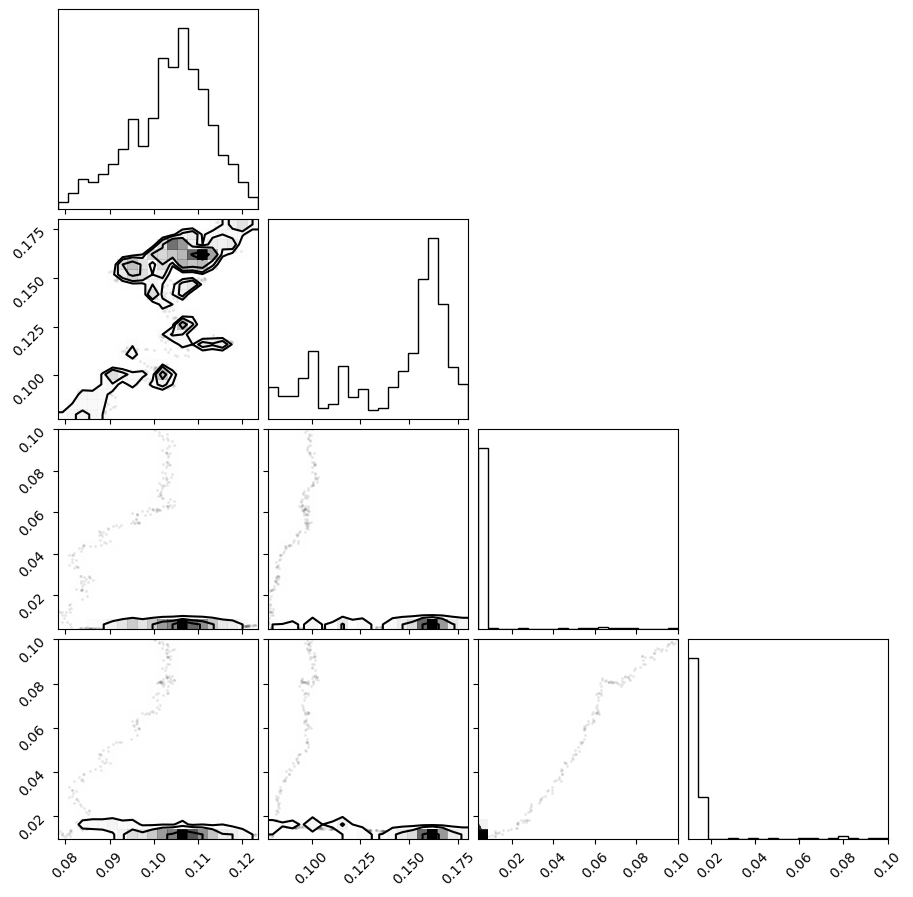

In [25]:
figure = corner.corner(Graf.T)

De la gráfica podemos ver que hay regiones en las que se vemás fuerte la densidad de puntos por lo que en esa región debería de encontrarse los valores verdaderos. Además por lo denso que es en una zona muy pequeña creo que es debido a que los parámetros verdaderos deben ser cantidades bantante pequeñas

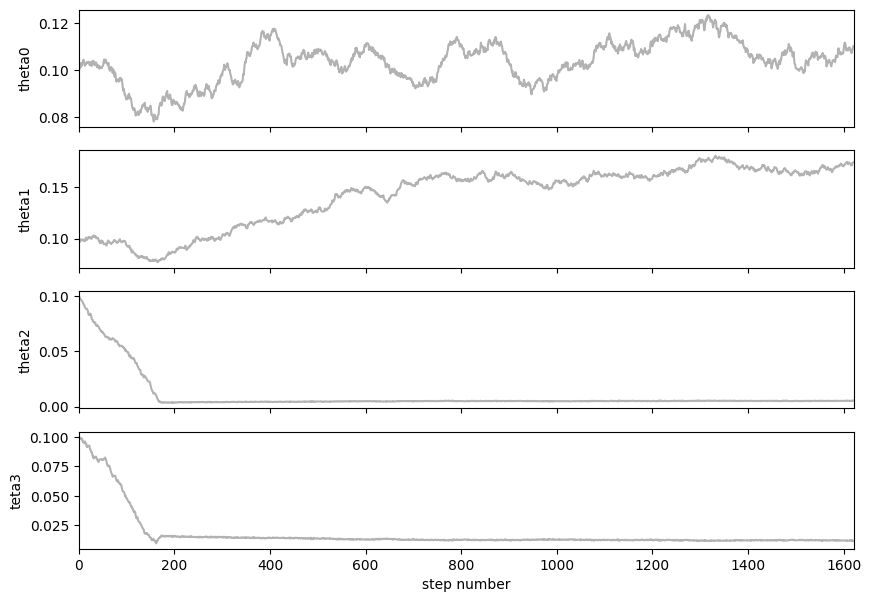

In [219]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
labels = ["theta0", "theta1", "theta2", "teta3"]
for i in range(4):
    ax = axes[i]
    ax.plot(Graf.T[:,i], "k", alpha=0.3)
    ax.set_xlim(0, len(Graf.T))
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("step number");

Prueba 2 con distintos puntos iniciales

In [70]:
#Theta propuesto incialmente, elegido por el usuario
tet_ini1=np.array([0,0.15,0.2,0.2])

In [71]:
Tethas1 = Eval(200000,y,x,tet_ini1,0.0005,0.0005,0.0005,0.0005,T_min0, T_max0, T_min1, T_max1,T_min2, T_max2,T_min3 , T_max3)

In [72]:
Graf1 = Tethas1.T

In [73]:
#último valor de Theta aceptado
Graf1[:,-1]

array([0.03618542, 0.15989723, 0.00484321, 0.01275986])

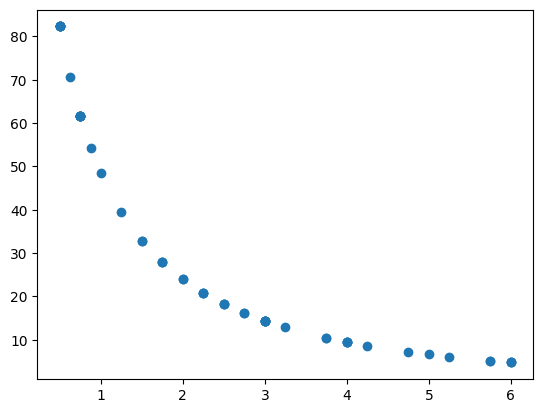

In [74]:
#Gráfica usando los últimos parámetros aceptados:
plt.scatter(x,model(x,Graf1[:,-1]))

(0.0, 0.06)

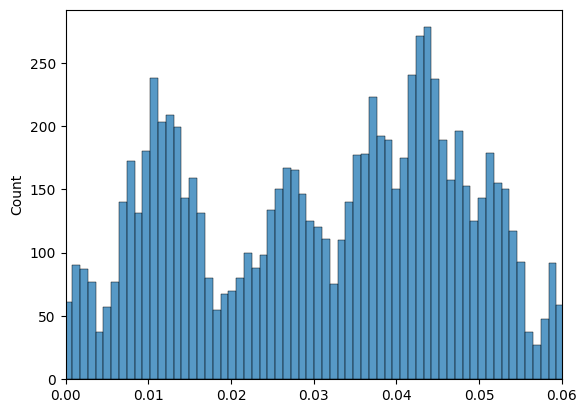

In [86]:
#Gráficos de theta0
sns.histplot(Graf1[0,:], bins=100)
plt.xlim(0,0.06)

Con este histograma vemos que donde es más propable que se encuentre theta0 debe de ser entre 0 y 0.06 aproximadamente

(0.15, 0.175)

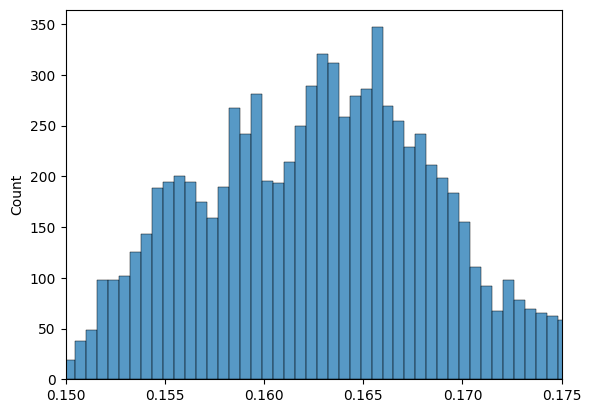

In [84]:
#Gráficos de theta1
sns.histplot(Graf1[1,:], bins=100)
plt.xlim(0.15,0.175)

Con este histograma vemos que el valor verdadero de theta1, parte del argumento del exponencial, debe encontrarse entre 0.155 y 0.17

(0.0, 0.015)

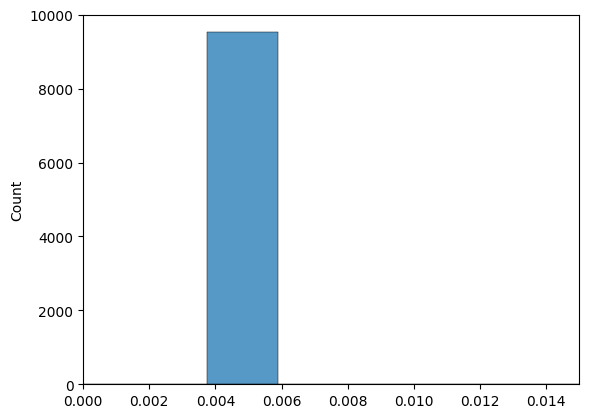

In [88]:
#Gráficos de theta2
sns.histplot(Graf1[2,:], bins=100)
plt.xlim(0,.015)

Con este histograma vemos que el valor verdadero de theta2, parte del denominador de la función, debe encontrarse entre 0.0.004 y 0.006

(0.005, 0.02)

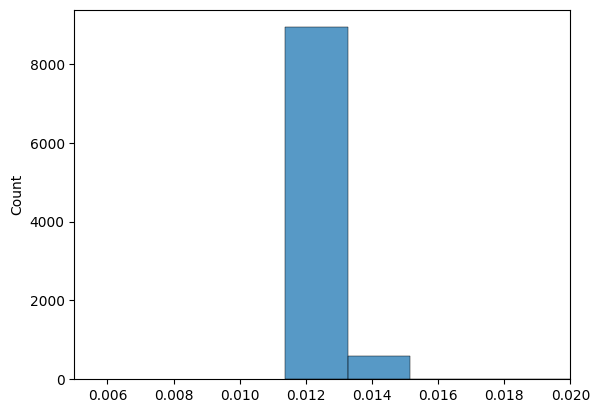

In [90]:
sns.histplot(Graf1[3,:], bins=100)
plt.xlim(0.005,0.02)

Con este histograma vemos que el valor verdadero de tetha3, parte del denominador de la función que se multiplica por x, debe encontrarse entre 0.01 y 0.015.

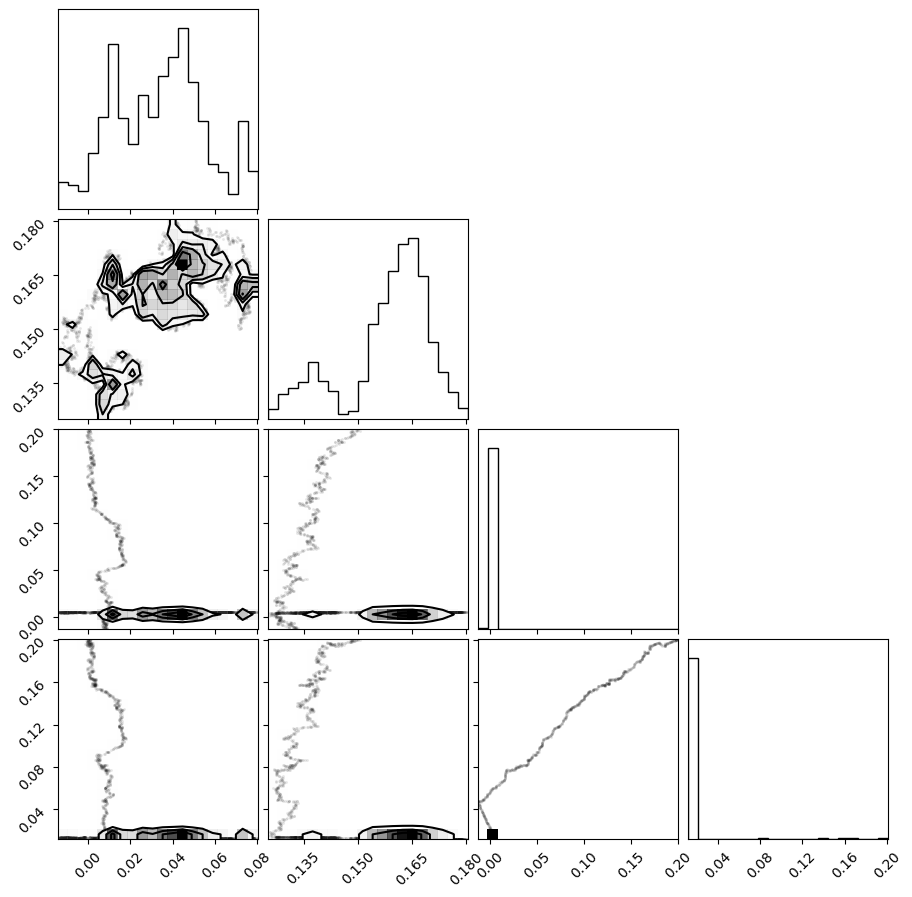

In [79]:
figure = corner.corner(Graf1.T)

Las gráficas obtenidas son similares a las que obtube cuando se inicia desde un punto inicial diferente además noté que las theta2 y theta3 son muy parecidas a las anteriormente obtenidas, además de esto la theta0 que es una constante que se suma a la función parece que es la que más cambia dependiendo del punto inicial por lo que para llegar a la función que describa los datos la constante no ha de tener tanto peso

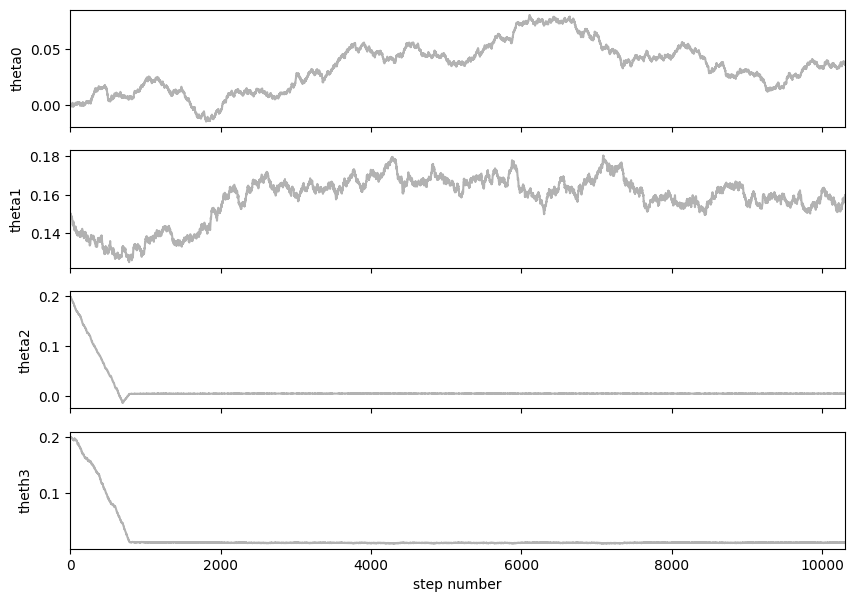

In [220]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
labels = ["theta0", "theta1", "theta2", "theth3"]
for i in range(4):
    ax = axes[i]
    ax.plot(Graf1.T[:,i], "k", alpha=0.3)
    ax.set_xlim(0, len(Graf1.T))
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("step number");

Prueba 3

In [94]:
#Theta propuesto incialmente, elegido por el usuario
tet_ini2=np.array([0.01,0.015,0.029,0.0001])

In [110]:
Tethas2 = Eval(150000,y,x,tet_ini2,0.002,0.002,0.002,0.002,T_min0, T_max0, T_min1, T_max1,T_min2, T_max2,T_min3 , T_max3)

In [111]:
Graf2 = Tethas2.T

In [112]:
#último valor de Theta aceptado
Graf2[:,-1]

array([-0.04667401,  0.14756573,  0.00484448,  0.01278511])

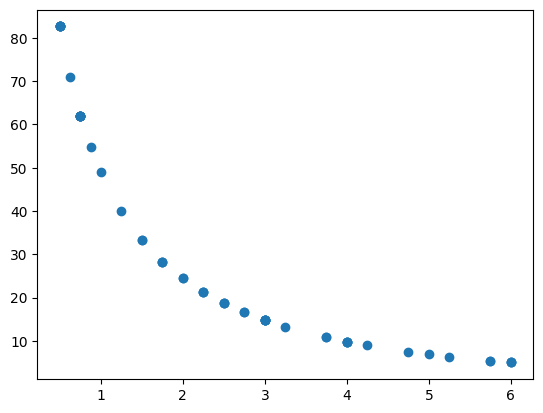

In [113]:
#Gráfica usando los últimos parámetros aceptados:
plt.scatter(x,model(x,Graf2[:,-1]))

(-0.02, 0.02)

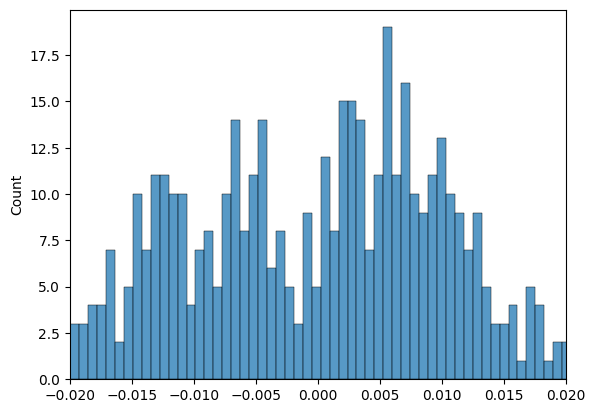

In [120]:
#Gráficos de theta0
sns.histplot(Graf2[0,:], bins=100)
plt.xlim(-0.02,0.02)

Con este histograma vemos que donde es más propable que se encuentre tetha0 debe de ser entre -0.02 y 0.015 aproximadamente

(0.125, 0.175)

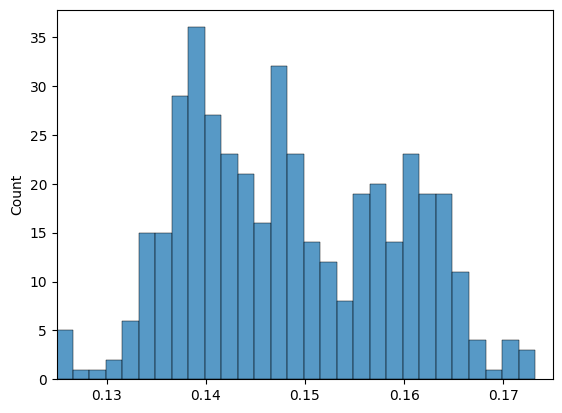

In [121]:
#Gráficos de theta1
sns.histplot(Graf2[1,:], bins=100)
plt.xlim(0.125,0.175)

Con este histograma vemos que el valor verdadero de theta1, parte del argumento del exponencial, debe encontrarse entre 0.13 y 0.17

(0.003, 0.006)

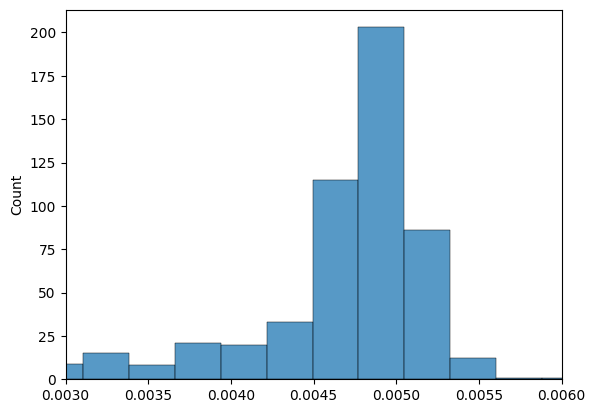

In [123]:
#Gráficos de theta2
sns.histplot(Graf2[2,:], bins=100)
plt.xlim(0.003, 0.006)

Con este histograma vemos que el valor verdadero de theta2, parte del denominador de la función, debe encontrarse entre 0.0.004 y 0.006

(0.011, 0.0175)

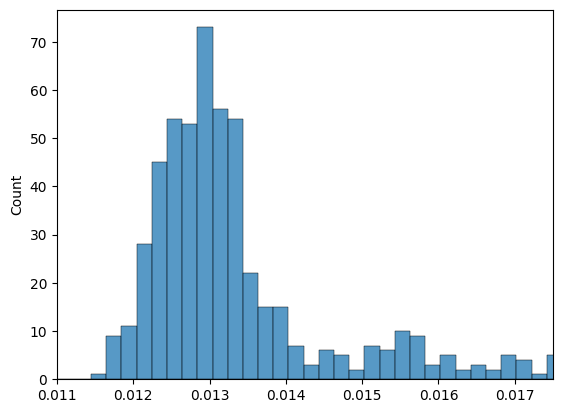

In [125]:
sns.histplot(Graf2[3,:], bins=100)
plt.xlim(0.011, 0.0175)

Con este histograma vemos que el valor verdadero de theta3, parte del denominador de la función que se multiplica por x, debe encontrarse entre 0.01 y 0.015.

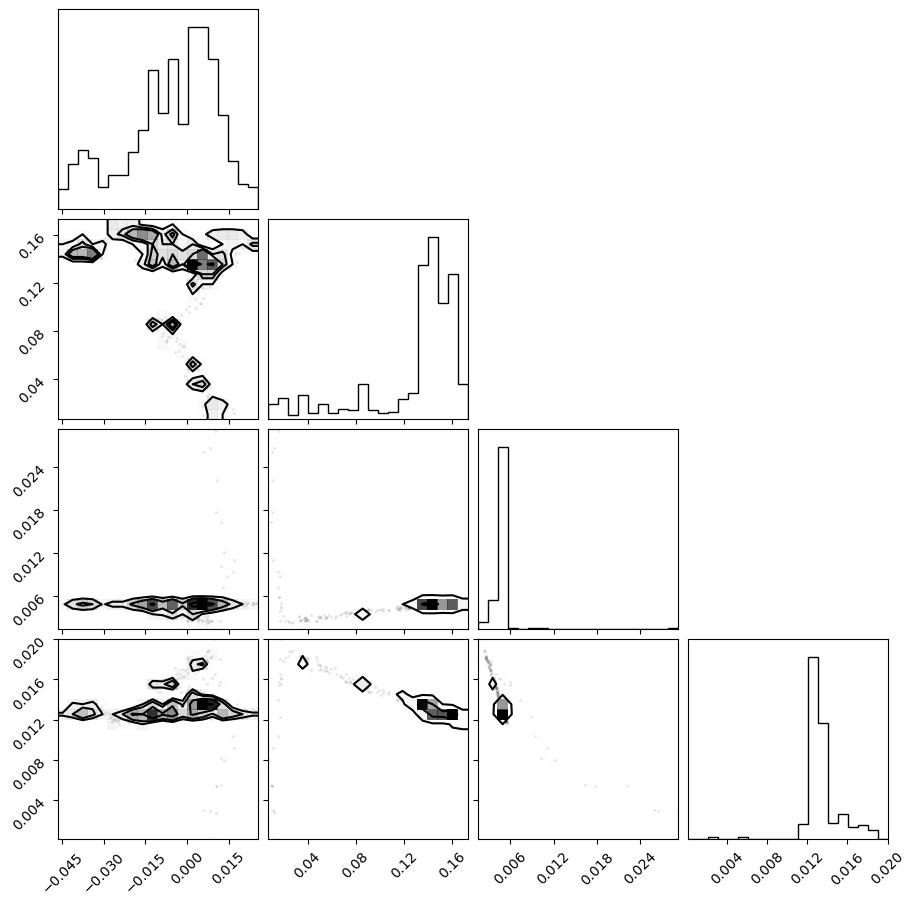

In [118]:
figure = corner.corner(Graf2.T)

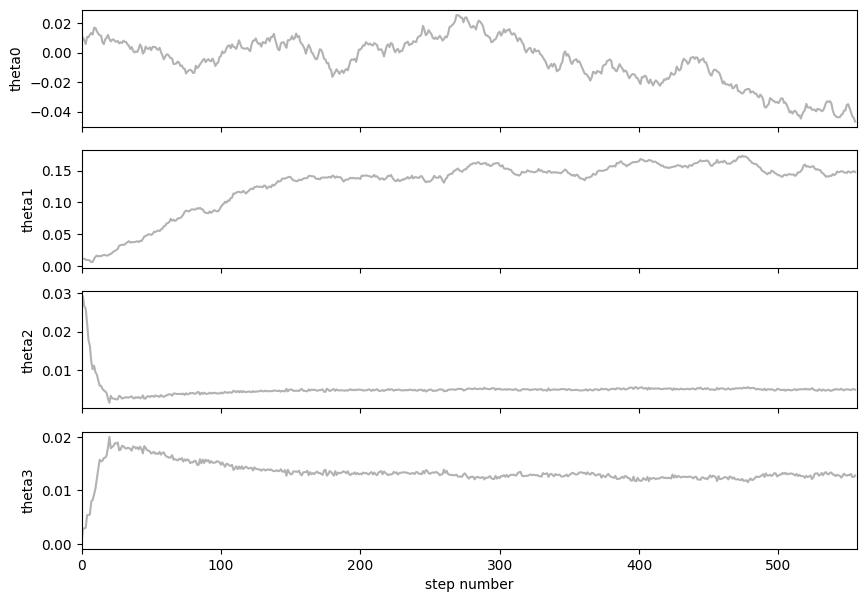

In [221]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
labels = ["theta0", "theta1", "theta2", "theta3"]
for i in range(4):
    ax = axes[i]
    ax.plot(Graf2.T[:,i], "k", alpha=0.3)
    ax.set_xlim(0, len(Graf2.T))
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("step number");

Al poner un punto inicial con el orden similar a los obtenidos previamente

Con las pruebas concluyo que el valor de theta0 no ha de afectar de manera significativa la función, por lo que puede tomar varios valores

Diagnostico de Gelman-Rubin para $\theta_0$

$S_{i}^2=\frac{1}{n-1}∑_{t=1}^n(X_{it}-\bar{X}_i)^2$

In [222]:
#Gelman-Rubin diagnostic usando el parámetro tetha0
def GelRub(Chain):
  suma=0
  for i in range(len(Chain[0])):
    suma += (Chain[0,i]-np.mean(Chain[0]))**2
  S_i=(1/(len(Chain[0])-1))*suma
  return S_i

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

In [223]:
S1 = GelRub(Graf)
S2 = GelRub(Graf1)
S3 = GelRub(Graf2)

In [224]:
SS=(1/3)*(S1+S2+S3)

In [225]:
#concatenamos para obtener la media general de un parámetro
Overall= np.concatenate((Graf[0],Graf1[0],Graf2[0]), axis=None)

In [226]:
#Lista con las medias de las cadenas
mean=[np.mean(Graf[0]),np.mean(Graf1[0]),np.mean(Graf2[0])]

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$

In [227]:
def B_N(means, Overall):
  Suma=0
  for i in range(2):
    Suma += (mean[i]-np.mean(Overall))**2
  B_N=(1/(3-1))*Suma
  return B_N

In [228]:
B_n = B_N(mean,Overall)

$\hat{\sigma}^2=\frac{n-1}{n}s^2+\frac{B}{n}$

In [229]:
def sigma(SS,B_N, n):
  sig=((n-1)/n)*SS+B_N
  return sig

In [230]:
sigma(SS,B_n,len(Graf[0]))

0.002235782013335139

$\hat{R} = \sqrt{\frac{\hat{\sigma}^2}{s^2}}$

In [231]:
R=np.sqrt(sigma(SS,B_n,len(Graf[0]))/SS)

# $\hat{R}$ Obtenido

In [232]:
R

2.888188438269395

Dignostico de Gelman-Rubin para $\theta_1$

In [233]:
#Gelman-Rubin diagnostic usando el parámetro tetha1
def GelRub(Chain):
  suma=0
  for i in range(len(Chain[1])):
    suma += (Chain[1,i]-np.mean(Chain[1]))**2
  S_i=(1/(len(Chain[1])-1))*suma
  return S_i

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

In [234]:
S1 = GelRub(Graf)
S2 = GelRub(Graf1)
S3 = GelRub(Graf2)

In [235]:
SS=(1/3)*(S1+S2+S3)

In [236]:
#concatenamos para obtener la media general de un parámetro
Overall= np.concatenate((Graf[1],Graf1[1],Graf2[1]), axis=None)

In [237]:
#Lista con las medias de las cadenas
mean=[np.mean(Graf[1]),np.mean(Graf1[1]),np.mean(Graf2[1])]

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$

In [238]:
B_n = B_N(mean,Overall)

$\hat{\sigma}^2=\frac{n-1}{n}s^2+\frac{B}{n}$

In [239]:
sigma(SS,B_n,len(Graf[0]))

0.0009477616101305256

$\hat{R} = \sqrt{\frac{\hat{\sigma}^2}{s^2}}$

In [240]:
R=np.sqrt(sigma(SS,B_n,len(Graf[0]))/SS)

# $\hat{R}$ Obtenido

In [241]:
R

1.052456508358193

Diagnostico Gelman-Rubin para $\theta_2$

In [242]:
#Gelman-Rubin diagnostic usando el parámetro tetha2
def GelRub(Chain):
  suma=0
  for i in range(len(Chain[2])):
    suma += (Chain[2,i]-np.mean(Chain[2]))**2
  S_i=(1/(len(Chain[2])-1))*suma
  return S_i

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

In [243]:
S1 = GelRub(Graf)
S2 = GelRub(Graf1)
S3 = GelRub(Graf2)

In [244]:
SS=(1/3)*(S1+S2+S3)

In [245]:
#concatenamos para obtener la media general de un parámetro
Overall= np.concatenate((Graf[2],Graf1[2],Graf2[2]), axis=None)

In [246]:
#Lista con las medias de las cadenas
mean=[np.mean(Graf[2]),np.mean(Graf1[2]),np.mean(Graf2[2])]

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$

In [247]:
B_n = B_N(mean,Overall)

$\hat{\sigma}^2=\frac{n-1}{n}s^2+\frac{B}{n}$

In [248]:
sigma(SS,B_n,len(Graf[0]))

0.000345859459709608

$\hat{R} = \sqrt{\frac{\hat{\sigma}^2}{s^2}}$

In [249]:
R=np.sqrt(sigma(SS,B_n,len(Graf[0]))/SS)

# $\hat{R}$ Obtenido

In [250]:
R

1.0001005916428718

Diagnostico Gelman-Rubin para $\theta_3$

In [251]:
#Gelman-Rubin diagnostic usando el parámetro tetha2
def GelRub(Chain):
  suma=0
  for i in range(len(Chain[3])):
    suma += (Chain[3,i]-np.mean(Chain[3]))**2
  S_i=(1/(len(Chain[3])-1))*suma
  return S_i

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

In [252]:
S1 = GelRub(Graf)
S2 = GelRub(Graf1)
S3 = GelRub(Graf2)

In [253]:
SS=(1/3)*(S1+S2+S3)

In [254]:
#concatenamos para obtener la media general de un parámetro
Overall= np.concatenate((Graf[3],Graf1[3],Graf2[3]), axis=None)

In [255]:
#Lista con las medias de las cadenas
mean=[np.mean(Graf[3]),np.mean(Graf1[3]),np.mean(Graf2[3])]

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$

In [256]:
B_n = B_N(mean,Overall)

$\hat{\sigma}^2=\frac{n-1}{n}s^2+\frac{B}{n}$

In [257]:
sigma(SS,B_n,len(Graf[0]))

0.0004423954325903221

$\hat{R} = \sqrt{\frac{\hat{\sigma}^2}{s^2}}$

In [258]:
R=np.sqrt(sigma(SS,B_n,len(Graf[0]))/SS)

# $\hat{R}$ Obtenido

In [259]:
R

1.003343009847038

Debido a los valores obtenidos concluyo que $\theta_0$ será un parámetro libre y los demás parámetros probablemente hayan convergido entre los valores mostrados en las gráficas anteriores